In [1]:
import pandas as pd
import EDA

In [2]:
import re
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from collections import Counter
from konlpy.tag import Okt
# from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 학습용 데이터 전처리

In [3]:
nsmc_train_df = pd.read_excel('train.xlsx')

In [4]:
X = nsmc_train_df.dropna()

In [5]:
X['clean'] = X['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
X['clean'].replace('', np.nan, inplace=True)
print(X.isnull().sum())

id         0
reviews    0
target     0
clean      0
dtype: int64


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15680\323574154.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  X['clean'] = X['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15680\323574154.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['clean'] = X['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15680\323574154.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['clean'].replace('', np.nan, inplace=True)


In [6]:
X['clean']

0                                           조아요 처음구입 싸게햇어요
1         생각보다 잘 안돼요 매지 바른지 하루밖에 안됐는데ㅠㅠ 천원가량 주고 사기 너무 아깝네요
2        디자인은괜찮은데 상품이 금이가서 교환했는데 두번째받은상품도 까져있고 안쪽에 금이가져...
3        기전에 이 제품말고 이마트 트레이더스에서만 팔던 프리미엄 제품을 사용했었습니다 샘플...
4                                         튼튼하고 손목을 잘 받쳐주네요
                               ...                        
24995                    일단향이너무너무좋은데지속력만좋다면좋겠지만워낙저렴해그래도좋아여
24996           동일한 업체에서 발송하고 한 상자로 배송되었는데 택배비는 이중 처리되었습니다
24997                                향이 좋아요 다른 향도 시켜보고 싶어요
24998                펼쳐보니 끝부분쯤에 정도 찟어져 있습니다 날짜관계로 구냥 사용합니다
24999                                     호호애미 제품은 늘 믿고 써요
Name: clean, Length: 24999, dtype: object

In [7]:
X

,id,reviews,target,clean
0,0,조아요 처음구입 싸게햇어요,2,조아요 처음구입 싸게햇어요
1,1,생각보다 잘 안돼요 매지 바른지 하루밖에 안됐는데ㅠㅠ 25천원가량 주고 사기 너무 ...,1,생각보다 잘 안돼요 매지 바른지 하루밖에 안됐는데ㅠㅠ 천원가량 주고 사기 너무 아깝네요
2,2,디자인은괜찮은데 상품이 금이가서 교환했는데 두번째받은상품도 까져있고 안쪽에 금이가져...,2,디자인은괜찮은데 상품이 금이가서 교환했는데 두번째받은상품도 까져있고 안쪽에 금이가져...
3,3,기전에 이 제품말고 이마트 트레이더스에서만 팔던 프리미엄 제품을 사용했었습니다. 샘...,2,기전에 이 제품말고 이마트 트레이더스에서만 팔던 프리미엄 제품을 사용했었습니다 샘플...
4,4,튼튼하고 손목을 잘 받쳐주네요~,5,튼튼하고 손목을 잘 받쳐주네요
...,...,...,...,...
24995,24995,일단향이너무너무좋은데지속력만좋다면좋겠지만..워낙저렴해그래도좋아여,5,일단향이너무너무좋은데지속력만좋다면좋겠지만워낙저렴해그래도좋아여
24996,24996,동일한 업체에서 발송하고 한 상자로 배송되었는데 택배비는 이중 처리되었습니다.,2,동일한 업체에서 발송하고 한 상자로 배송되었는데 택배비는 이중 처리되었습니다
24997,24997,향이 좋아요!! 다른 향도 시켜보고 싶어요,4,향이 좋아요 다른 향도 시켜보고 싶어요
24998,24998,펼쳐보니 끝부분쯤에 50cm정도 찟어져 있습니다 날짜관계로 구냥 사용합니다,2,펼쳐보니 끝부분쯤에 정도 찟어져 있습니다 날짜관계로 구냥 사용합니다


In [8]:
rating4Data = X[X['target'] == 4]['clean']

In [9]:
rating4Data

13                                         너무 잘사용했어요 감사합니다
15                                다른거는 다만족하는데 나사부분이ㅈ맘엥ㄴ들어서
24                                          깨끗하게 정리되었어요 굿굿
32                         색깔이랑 넘 이쁘고 팔걸이가 넓어 편하고 쿠션감도 좋아요
59       좋아요 여름에는 속옷입고 나시입고 하면 너무 더운데이 나시는 안에 캡이 있어서 따로...
                               ...                        
24937                                  자전거 라이딩 할때 쓸건데 ㅈㅎ아요
24942                            재구매 구입하고 넘 편해서 지인한테 선물했어요
24967                              기저귀랑 손수건 등등 정리하려고 구입했어용
24968    유튜버님 추천 보고 바로 산건데 주변 사람들 한테 이거 좋다고 백번씩 설명하고 다녔...
24997                                향이 좋아요 다른 향도 시켜보고 싶어요
Name: clean, Length: 2500, dtype: object

In [10]:
result = []

for i in rating4Data.to_list():
    result.append(EDA.EDA(i,alpha_sr=0.1, alpha_ri=0.1, alpha_rs=0.4, p_rd=0.4,num_aug = 3))

In [11]:
result

[['너무 잘사용했어요 감사합니다', '잘사용했어요 너무 감사합니다', '너무', '너무 잘사용했어요 감사합니다'],
 ['나사부분이ㅈ맘엥ㄴ들어서',
  '다른거는 다만족하는데 나사부분이ㅈ맘엥ㄴ들어서',
  '다른거는 다만족하는데 나사부분이ㅈ맘엥ㄴ들어서',
  '다른거는 다만족하는데 나사부분이ㅈ맘엥ㄴ들어서'],
 ['깨끗하게 정리되었어요 굿굿', '정리되었어요', '깨끗하게 정리되었어요 굿굿', '깨끗하게 정리되었어요 굿굿'],
 ['색깔이랑 넘 이쁘고 팔걸이가 넓어 편하고 쿠션감도 좋아요',
  '색깔이랑 이쁘고 팔걸이가 넓어',
  '색깔이랑 넘 이쁘고 팔걸이가 넓어 편하고 쿠션감도 좋아요',
  '색깔이랑 넘 이쁘고 팔걸이가 넓어 편하고 쿠션감도 좋아요'],
 ['좋아요 여름에는 안입어도 나시입고 캡이 편하고 더운데이 나시는 안에 하면 있어서 너무 좋네요 따로 되고 속옷입고 속옷',
  '좋아요 여름에는 속옷입고 나시입고 하면 너무 더운데이 나시는 안에 캡이 있어서 따로 속 안입어도 되고 편하고 좋네요',
  '좋아요 여름에는 속옷입고 나시입고 하면 너무 더운데이 나시는 안에 캡이 있어서 따로 속옷 안입어도 되고 편하고 좋네요',
  '좋아요 여름에는 속옷입고 나시입고 하면 너무 더운데이 나시는 안에 캡이 있어서 따로 속옷 안입어도 되고 편하고 좋네요'],
 ['배송도 빠르고 아이가 색깔이랑 쓰기에도 편하다고 하네요',
  '배송도 빠르고 아이가 색깔이랑 쓰기에도 편하다고 하네요',
  '아이가 색깔이랑 쓰기에도',
  '배송도 빠르고 아이가 색깔이랑 쓰기에도 편하다고 하네요'],
 ['좋아요ㅠ잘쓰고닛어요', '좋아요ㅠ잘쓰고닛어요', '좋아요ㅠ잘쓰고닛어요', '좋아요ㅠ잘쓰고닛어요'],
 ['재구매 좋은쌀 잘받았습니다 잘먹을게요',
  '재구매 좋은쌀 잘받았습니다 잘먹을게요',
  '재구매 잘먹을게요 잘받았습니다 좋은쌀',
  '재구매 좋은쌀 잘받았습니다 잘먹을게요'],
 ['풀도 넉넉히 꼼꼼하게 잘 발라져 있고 만족합니다',
  '풀도 넉넉히 꼼꼼하게 잘

In [12]:
dummya = np.array(result).reshape((-1,))

In [13]:
dummyb = rating4Data.to_numpy()

In [14]:
rating4Data = np.concatenate((dummya, dummyb),axis=0)

In [15]:
rating4Data

array(['너무 잘사용했어요 감사합니다', '잘사용했어요 너무 감사합니다', '너무', ...,
       '기저귀랑 손수건 등등 정리하려고 구입했어용',
       '유튜버님 추천 보고 바로 산건데 주변 사람들 한테 이거 좋다고 백번씩 설명하고 다녔어용 아 근데 어떤 날은 아예 안 올라가는데 가끔 말려 올라가는 거 빼고 다 좋아요 만간 더 구매예정',
       '향이 좋아요 다른 향도 시켜보고 싶어요'], dtype=object)

In [16]:
rating4Data.shape

(12500,)

In [17]:
rating4Data = pd.DataFrame(rating4Data,columns=['clean'])

In [18]:
rating4Data

,clean
0,너무 잘사용했어요 감사합니다
1,잘사용했어요 너무 감사합니다
2,너무
3,너무 잘사용했어요 감사합니다
4,나사부분이ㅈ맘엥ㄴ들어서
...,...
12495,자전거 라이딩 할때 쓸건데 ㅈㅎ아요
12496,재구매 구입하고 넘 편해서 지인한테 선물했어요
12497,기저귀랑 손수건 등등 정리하려고 구입했어용
12498,유튜버님 추천 보고 바로 산건데 주변 사람들 한테 이거 좋다고 백번씩 설명하고 다녔...


In [19]:
rating4Data['target'] = 4

In [20]:
rating4Data

,clean,target
0,너무 잘사용했어요 감사합니다,4
1,잘사용했어요 너무 감사합니다,4
2,너무,4
3,너무 잘사용했어요 감사합니다,4
4,나사부분이ㅈ맘엥ㄴ들어서,4
...,...,...
12495,자전거 라이딩 할때 쓸건데 ㅈㅎ아요,4
12496,재구매 구입하고 넘 편해서 지인한테 선물했어요,4
12497,기저귀랑 손수건 등등 정리하려고 구입했어용,4
12498,유튜버님 추천 보고 바로 산건데 주변 사람들 한테 이거 좋다고 백번씩 설명하고 다녔...,4


In [21]:
rating1Data = X[X['target'] == 1]['clean']

In [22]:
rating1Data.shape

(4499,)

In [23]:
result = []

for i in rating1Data.to_list():
    result.append(EDA.EDA(i,alpha_sr=0.1, alpha_ri=0.1, alpha_rs=0.4, p_rd=0.4,num_aug = 1))

In [24]:
dummya = np.array(result).reshape((-1,))
dummyb = rating1Data.to_numpy()

In [25]:
print(dummya.shape)
print(dummyb.shape)

(8998,)
(4499,)


In [26]:
rating1Data = np.concatenate((dummya, dummyb),axis=0)

In [27]:
rating1Data.shape

(13497,)

In [28]:
rating1Data

array(['생각보다 잘 안돼요 매지 바른지 하루밖에 안됐는데ㅠㅠ 천원가량 주고 사기 너무 아깝네요',
       '생각보다 잘 안돼요 매지 바른지 하루밖에 안됐는데ㅠㅠ 천원가량 주고 사기 너무 아깝네요',
       '완전 팔지 베란다문 집에서 분리해도 진동해서 왔어요 열고 그래도 내장과 분리 마세요 산선해요 이런 버려야할듯 핑크색으로 변해있더라구요 내장이랑 냄새가나서 오징어가 완전 쓰레기를 돈주고 다 제발 샀네요 상품 골아서 해봤네요 동네 마트가 더 썩은내가',
       ...,
       '배송 엉망 전복죽시켰늣데 호박죽 왔음 다른 곳은 환불처리나 다시보내주는데 전화와서 그냥 먹으라고 한다 어이상실',
       '후기에 파손된 제품들이 많아서 걱정했는데 역시나 파손돼서 오는군요개샀는데 귀찮아서 그냥 씁니다다른 구매자분들께는 신경써서 보내주세요',
       '좋아용 생각했던거보다'], dtype=object)

In [29]:
rating1Data = pd.DataFrame(rating1Data,columns=['clean'])

In [30]:
rating1Data

,clean
0,생각보다 잘 안돼요 매지 바른지 하루밖에 안됐는데ㅠㅠ 천원가량 주고 사기 너무 아깝네요
1,생각보다 잘 안돼요 매지 바른지 하루밖에 안됐는데ㅠㅠ 천원가량 주고 사기 너무 아깝네요
2,완전 팔지 베란다문 집에서 분리해도 진동해서 왔어요 열고 그래도 내장과 분리 마세요...
3,완전 골아서 왔어요 집에서 썩은내가 진동해서 베란다문 열고 그래도 내장이랑 분리 해...
4,이상한 나오네요 프린터의 나와요 다른 찍혀 문제인줄 알았는데 제 사람도 벌레모양처럼...
...,...
13492,이건 아무리 세게 눌러도 소리는 커녕 똥안나오고 나온다해도 사용하기 넘 힘든제품일듯...
13493,볼트 조이라고 준 간이 스패너 안맞습니다 개나 들어있는데 스탠드 설치하는데 볼트구멍...
13494,배송 엉망 전복죽시켰늣데 호박죽 왔음 다른 곳은 환불처리나 다시보내주는데 전화와서 ...
13495,후기에 파손된 제품들이 많아서 걱정했는데 역시나 파손돼서 오는군요개샀는데 귀찮아서 ...


In [31]:
rating1Data['target'] = 1

In [32]:
rating1Data

,clean,target
0,생각보다 잘 안돼요 매지 바른지 하루밖에 안됐는데ㅠㅠ 천원가량 주고 사기 너무 아깝네요,1
1,생각보다 잘 안돼요 매지 바른지 하루밖에 안됐는데ㅠㅠ 천원가량 주고 사기 너무 아깝네요,1
2,완전 팔지 베란다문 집에서 분리해도 진동해서 왔어요 열고 그래도 내장과 분리 마세요...,1
3,완전 골아서 왔어요 집에서 썩은내가 진동해서 베란다문 열고 그래도 내장이랑 분리 해...,1
4,이상한 나오네요 프린터의 나와요 다른 찍혀 문제인줄 알았는데 제 사람도 벌레모양처럼...,1
...,...,...
13492,이건 아무리 세게 눌러도 소리는 커녕 똥안나오고 나온다해도 사용하기 넘 힘든제품일듯...,1
13493,볼트 조이라고 준 간이 스패너 안맞습니다 개나 들어있는데 스탠드 설치하는데 볼트구멍...,1
13494,배송 엉망 전복죽시켰늣데 호박죽 왔음 다른 곳은 환불처리나 다시보내주는데 전화와서 ...,1
13495,후기에 파손된 제품들이 많아서 걱정했는데 역시나 파손돼서 오는군요개샀는데 귀찮아서 ...,1


In [33]:
X = X.drop(X[X['target'] == 1].index)

In [34]:
X

,id,reviews,target,clean
0,0,조아요 처음구입 싸게햇어요,2,조아요 처음구입 싸게햇어요
2,2,디자인은괜찮은데 상품이 금이가서 교환했는데 두번째받은상품도 까져있고 안쪽에 금이가져...,2,디자인은괜찮은데 상품이 금이가서 교환했는데 두번째받은상품도 까져있고 안쪽에 금이가져...
3,3,기전에 이 제품말고 이마트 트레이더스에서만 팔던 프리미엄 제품을 사용했었습니다. 샘...,2,기전에 이 제품말고 이마트 트레이더스에서만 팔던 프리미엄 제품을 사용했었습니다 샘플...
4,4,튼튼하고 손목을 잘 받쳐주네요~,5,튼튼하고 손목을 잘 받쳐주네요
5,5,배송은 먼저 구입하신 분들께서 오래걸린다고 하여 참고 기달렸습니다 생각보다 일찍도착...,2,배송은 먼저 구입하신 분들께서 오래걸린다고 하여 참고 기달렸습니다 생각보다 일찍도착...
...,...,...,...,...
24995,24995,일단향이너무너무좋은데지속력만좋다면좋겠지만..워낙저렴해그래도좋아여,5,일단향이너무너무좋은데지속력만좋다면좋겠지만워낙저렴해그래도좋아여
24996,24996,동일한 업체에서 발송하고 한 상자로 배송되었는데 택배비는 이중 처리되었습니다.,2,동일한 업체에서 발송하고 한 상자로 배송되었는데 택배비는 이중 처리되었습니다
24997,24997,향이 좋아요!! 다른 향도 시켜보고 싶어요,4,향이 좋아요 다른 향도 시켜보고 싶어요
24998,24998,펼쳐보니 끝부분쯤에 50cm정도 찟어져 있습니다 날짜관계로 구냥 사용합니다,2,펼쳐보니 끝부분쯤에 정도 찟어져 있습니다 날짜관계로 구냥 사용합니다


In [35]:
X = X.drop(X[X['target'] == 4].index)

In [36]:
X

,id,reviews,target,clean
0,0,조아요 처음구입 싸게햇어요,2,조아요 처음구입 싸게햇어요
2,2,디자인은괜찮은데 상품이 금이가서 교환했는데 두번째받은상품도 까져있고 안쪽에 금이가져...,2,디자인은괜찮은데 상품이 금이가서 교환했는데 두번째받은상품도 까져있고 안쪽에 금이가져...
3,3,기전에 이 제품말고 이마트 트레이더스에서만 팔던 프리미엄 제품을 사용했었습니다. 샘...,2,기전에 이 제품말고 이마트 트레이더스에서만 팔던 프리미엄 제품을 사용했었습니다 샘플...
4,4,튼튼하고 손목을 잘 받쳐주네요~,5,튼튼하고 손목을 잘 받쳐주네요
5,5,배송은 먼저 구입하신 분들께서 오래걸린다고 하여 참고 기달렸습니다 생각보다 일찍도착...,2,배송은 먼저 구입하신 분들께서 오래걸린다고 하여 참고 기달렸습니다 생각보다 일찍도착...
...,...,...,...,...
24994,24994,잘 밀리지도 않고 허벅지도 덜뜨거워요 생각보다 거칠지 않아서 편함,5,잘 밀리지도 않고 허벅지도 덜뜨거워요 생각보다 거칠지 않아서 편함
24995,24995,일단향이너무너무좋은데지속력만좋다면좋겠지만..워낙저렴해그래도좋아여,5,일단향이너무너무좋은데지속력만좋다면좋겠지만워낙저렴해그래도좋아여
24996,24996,동일한 업체에서 발송하고 한 상자로 배송되었는데 택배비는 이중 처리되었습니다.,2,동일한 업체에서 발송하고 한 상자로 배송되었는데 택배비는 이중 처리되었습니다
24998,24998,펼쳐보니 끝부분쯤에 50cm정도 찟어져 있습니다 날짜관계로 구냥 사용합니다,2,펼쳐보니 끝부분쯤에 정도 찟어져 있습니다 날짜관계로 구냥 사용합니다


In [37]:
X = pd.concat([X,rating1Data])

In [38]:
X = pd.concat([X,rating4Data])

In [39]:
X

,id,reviews,target,clean
0,0.0,조아요 처음구입 싸게햇어요,2,조아요 처음구입 싸게햇어요
2,2.0,디자인은괜찮은데 상품이 금이가서 교환했는데 두번째받은상품도 까져있고 안쪽에 금이가져...,2,디자인은괜찮은데 상품이 금이가서 교환했는데 두번째받은상품도 까져있고 안쪽에 금이가져...
3,3.0,기전에 이 제품말고 이마트 트레이더스에서만 팔던 프리미엄 제품을 사용했었습니다. 샘...,2,기전에 이 제품말고 이마트 트레이더스에서만 팔던 프리미엄 제품을 사용했었습니다 샘플...
4,4.0,튼튼하고 손목을 잘 받쳐주네요~,5,튼튼하고 손목을 잘 받쳐주네요
5,5.0,배송은 먼저 구입하신 분들께서 오래걸린다고 하여 참고 기달렸습니다 생각보다 일찍도착...,2,배송은 먼저 구입하신 분들께서 오래걸린다고 하여 참고 기달렸습니다 생각보다 일찍도착...
...,...,...,...,...
12495,NaN,NaN,4,자전거 라이딩 할때 쓸건데 ㅈㅎ아요
12496,NaN,NaN,4,재구매 구입하고 넘 편해서 지인한테 선물했어요
12497,NaN,NaN,4,기저귀랑 손수건 등등 정리하려고 구입했어용
12498,NaN,NaN,4,유튜버님 추천 보고 바로 산건데 주변 사람들 한테 이거 좋다고 백번씩 설명하고 다녔...


In [40]:
X = X.sort_values(by=['target'])

In [41]:
X

,id,reviews,target,clean
3998,NaN,NaN,1,재구매 좋습니다 항시 무거우셨나봄니다 터져서 왔내요
4505,NaN,NaN,1,월일 시 이전 구매후 일 오후에 받았습니다 연휴직전도 아니고 말도 안되는 배송과 판...
4504,NaN,NaN,1,구매후 시 이전 월일 일 오후에 받았습니다 배송과 아니고 답변에 안되는 판매자의 연...
4503,NaN,NaN,1,일주일 사용 후기입니다 무선충전기를 자주 사용하는데 뒷면에 스크래치는 엄청나게 많이...
4502,NaN,NaN,1,일주일 후기입니다 뒷면에 스크래치는 많이나고 케이스 안에 많이들어가서 빼려고하는데 ...
...,...,...,...,...
8433,8433.0,배송은 좀 걸렸지만 제품 완전 맘에들어요,5,배송은 좀 걸렸지만 제품 완전 맘에들어요
8435,8435.0,배송짱빨라요 백화점 보다 싸게 잘 산것 같아요 배송도 진짜 빠르고 색깔이 딱 제가 ...,5,배송짱빨라요 백화점 보다 싸게 잘 산것 같아요 배송도 진짜 빠르고 색깔이 딱 제가 ...
8436,8436.0,이갈이 나무를 줬더니 철창을 안 뜯어서 넘 좋아요 또 사야겠어요,5,이갈이 나무를 줬더니 철창을 안 뜯어서 넘 좋아요 또 사야겠어요
8423,8423.0,재구매 배송도 빠르고 쓰기도 엄청 편했어요,5,재구매 배송도 빠르고 쓰기도 엄청 편했어요


In [42]:
X = X[['clean','target']]

In [43]:
X

,clean,target
3998,재구매 좋습니다 항시 무거우셨나봄니다 터져서 왔내요,1
4505,월일 시 이전 구매후 일 오후에 받았습니다 연휴직전도 아니고 말도 안되는 배송과 판...,1
4504,구매후 시 이전 월일 일 오후에 받았습니다 배송과 아니고 답변에 안되는 판매자의 연...,1
4503,일주일 사용 후기입니다 무선충전기를 자주 사용하는데 뒷면에 스크래치는 엄청나게 많이...,1
4502,일주일 후기입니다 뒷면에 스크래치는 많이나고 케이스 안에 많이들어가서 빼려고하는데 ...,1
...,...,...
8433,배송은 좀 걸렸지만 제품 완전 맘에들어요,5
8435,배송짱빨라요 백화점 보다 싸게 잘 산것 같아요 배송도 진짜 빠르고 색깔이 딱 제가 ...,5
8436,이갈이 나무를 줬더니 철창을 안 뜯어서 넘 좋아요 또 사야겠어요,5
8423,재구매 배송도 빠르고 쓰기도 엄청 편했어요,5


In [44]:
X_train = X['clean']

In [45]:
Y_train = X[['target']].astype(str)

In [46]:
Y_train

,target
3998,1
4505,1
4504,1
4503,1
4502,1
...,...
8433,5
8435,5
8436,5
8423,5


In [47]:
Y_train = pd.get_dummies(Y_train[['target']]).to_numpy()

In [48]:
Y_train

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       ...,
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1]], dtype=uint8)

# 테스트 데이터 전처리

In [49]:
X_test = pd.read_excel('test.xlsx')

In [50]:
X_test['clean'] = X_test['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
X_test['clean'].replace('', np.nan, inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15680\630216630.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  X_test['clean'] = X_test['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


In [51]:
X_test

,id,reviews,clean
0,0,채소가 약간 시들어 있어요,채소가 약간 시들어 있어요
1,1,발톱 두껍고 단단한 분들 써도 소용없어요 이 테이프 물렁거리고 힘이없어서 들어 올리...,발톱 두껍고 단단한 분들 써도 소용없어요 이 테이프 물렁거리고 힘이없어서 들어 올리...
2,2,부들부들 좋네요 입어보고 시원하면 또 살게요,부들부들 좋네요 입어보고 시원하면 또 살게요
3,3,이런 1. 8 골드 주라니깐 파란개 오네 회사전화걸어도 받지도 않고 머하자는거임?,이런 골드 주라니깐 파란개 오네 회사전화걸어도 받지도 않고 머하자는거임
4,4,검수도 없이 보내구 불량 배송비 5000원 청구하네요 완전별로 별하나도 아까워요,검수도 없이 보내구 불량 배송비 원 청구하네요 완전별로 별하나도 아까워요
...,...,...,...
24995,24995,사용해보니 좋아요~^^,사용해보니 좋아요
24996,24996,저렴한가격에. 질좋고. 핏좋고. 너무. 이쁘게. 입고다녀요..,저렴한가격에 질좋고 핏좋고 너무 이쁘게 입고다녀요
24997,24997,세트상품이라고 써있어서 그런줄 알고 구매했더니 단품이었네요 낚인 느낌도 들고 그러네...,세트상품이라고 써있어서 그런줄 알고 구매했더니 단품이었네요 낚인 느낌도 들고 그러네...
24998,24998,역시 로네펠트!! 좋아요.,역시 로네펠트 좋아요


# 형태소 분석기

In [52]:
okt = Okt()

In [53]:
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게']

In [54]:
X['tokenized'] =X_train.apply(okt.morphs)
X['tokenized'] = X['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15680\3674460966.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['tokenized'] =X_train.apply(okt.morphs)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15680\3674460966.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['tokenized'] = X['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])


In [55]:
X_test['tokenized'] = X_test['reviews'].apply(okt.morphs)
X_test['tokenized'] = X_test['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

In [56]:
np.concatenate((X['tokenized'].values,X_test['tokenized'].values))

array([list(['재구매', '좋습니다', '항시', '무거우셨나', '봄니다', '터져서', '왔내요']),
       list(['월일', '시', '이전', '구매', '후', '일', '오후', '받았습니다', '연', '휴직', '전도', '아니고', '말', '안되는', '배송', '판매', '자의', '성의', '없는', '답변', '구매', '하기', '싫어집니다']),
       list(['구매', '후', '시', '이전', '월일', '일', '오후', '받았습니다', '배송', '아니고', '답변', '안되는', '판매', '자의', '연', '휴직', '전도', '성의', '없는', '말', '구매', '하기', '싫어집니다']),
       ...,
       list(['세트', '상품', '이라고', '써있어서', '그런줄', '알', '구매', '했더니', '단', '품', '이었네요', '낚', '느낌', '들고', '그러네요', '딘품', '이란', '표시', '안', '해놓으시고', '이런', '식', '으로', '판매', '하시는', '건', '아닌듯', '싶어요', '물건', '가격', '대비', '별', '루', '요']),
       list(['역시', '로', '펠트', '!!', '좋아요', '.']),
       list(['데싱', '디바', '써', '보고', '갠', '찮아서', '비슷', '줄', '알앗더니', '완전', '별로', '예요', 'ㅡㅡ', '3000', '언', '더주고', '디바', '낫네요'])],
      dtype=object)

In [57]:
words = np.concatenate((X['tokenized'].values,X_test['tokenized'].values))

In [58]:
X_train = X['tokenized'].values

In [59]:
X_test = X_test['tokenized'].values

# 토큰화

In [60]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(words)

In [61]:
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 52227
등장 빈도가 1번 이하인 희귀 단어의 수: 24938
단어 집합에서 희귀 단어의 비율: 47.749248473012045
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 2.803323339931901


In [62]:
vocab_size = total_cnt - rare_cnt + 2

In [63]:
vocab_size # 데이터 종류 개수

27291

훈련데이터 토큰화 적용

In [64]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(words)

In [65]:
X_train = tokenizer.texts_to_sequences(X_train)

In [66]:
X_train

[[9, 62, 14337, 16970, 14338, 654, 8716],
 [2090,
  219,
  1285,
  10,
  144,
  111,
  2685,
  202,
  1002,
  16971,
  8047,
  384,
  281,
  1581,
  4,
  235,
  4942,
  2345,
  449,
  775,
  10,
  109,
  16972],
 [10,
  144,
  219,
  1285,
  2090,
  111,
  2685,
  202,
  4,
  384,
  775,
  1581,
  235,
  4942,
  1002,
  16971,
  8047,
  2345,
  449,
  281,
  10,
  109,
  16972],
 [379,
  11,
  247,
  23,
  2156,
  1427,
  365,
  11,
  200,
  698,
  86,
  1382,
  2469,
  29,
  57,
  342,
  8,
  305,
  29,
  1524,
  16973,
  1106,
  1445,
  957,
  1032,
  2510,
  945,
  119,
  475,
  521,
  2914,
  197,
  14339,
  229,
  23],
 [379,
  247,
  23,
  698,
  86,
  1382,
  29,
  57,
  342,
  8,
  29,
  1524,
  16973,
  1445,
  957,
  521,
  2914,
  197,
  14339,
  229,
  23],
 [1088, 748, 3736, 4135, 932, 152, 85, 12036, 502, 78, 133],
 [1088, 748, 4135, 932, 152, 85, 12036, 502, 3736, 78, 133],
 [10563,
  338,
  182,
  23,
  1896,
  12,
  451,
  346,
  148,
  14,
  2562,
  67,
  32,
  2,
  7

In [67]:
dummy = tokenizer.texts_to_sequences(X_test)

In [68]:
dummy

[[4744, 236, 21550, 96],
 [3882,
  1319,
  6090,
  703,
  2120,
  9802,
  692,
  20285,
  463,
  231,
  719,
  1,
  28,
  296,
  2723,
  692,
  1,
  76,
  119,
  5949,
  26],
 [3121, 48, 4094, 1, 76, 4268],
 [215,
  373,
  3,
  2382,
  1457,
  155,
  20534,
  5785,
  36,
  25405,
  807,
  430,
  21551,
  4778,
  97,
  1197,
  25406,
  178],
 [549, 132, 1, 182, 438, 16769, 12919, 118, 81, 30, 1576, 951],
 [858, 1168, 70, 776, 19, 105, 15, 90, 706],
 [56, 22813, 1655, 2455, 15, 6710, 216, 26, 301, 21, 1353, 3],
 [2,
  1386,
  3,
  391,
  402,
  34,
  1854,
  5107,
  77,
  6,
  3,
  15,
  14253,
  3117,
  6,
  42,
  510,
  1999,
  402,
  8969,
  706,
  3],
 [9, 19, 60, 10467, 2395, 44, 1302, 907, 43, 76, 3975],
 [9, 79, 5, 1233, 4, 50, 544, 1674, 5, 48, 218],
 [18, 17, 29, 938, 3],
 [548, 426, 1560, 482],
 [7, 232, 364, 1063, 682],
 [505, 410, 1526, 334, 4852, 234, 103, 12, 4, 202, 3, 106, 184, 15, 11, 41],
 [56, 34, 25407, 3296, 8743, 11223, 20864, 33, 3557],
 [499,
  437,
  1072,
  122,

# 데이터 형태소 개수 확인

In [69]:
import matplotlib.pyplot as plt

(array([1.0896e+04, 1.5129e+04, 7.3330e+03, 4.7770e+03, 2.4000e+03,
        1.8800e+03, 1.1590e+03, 3.7000e+02, 4.5000e+01, 8.0000e+00]),
 array([ 0. ,  5.8, 11.6, 17.4, 23.2, 29. , 34.8, 40.6, 46.4, 52.2, 58. ]),
 <BarContainer object of 10 artists>)

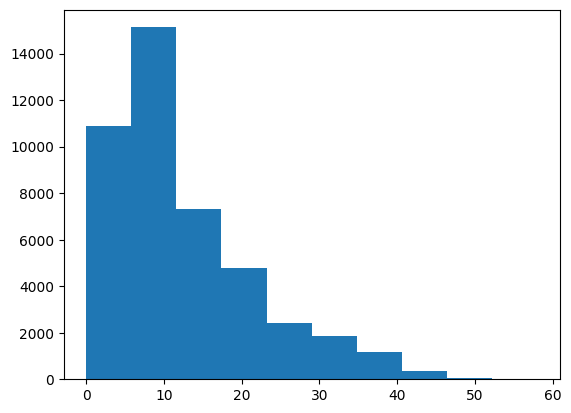

In [70]:
plt.hist([len(i) for i in X_train])

In [71]:
sum([len(i) for i in X_train])/len(X_train)

12.464281655567426

(array([7.203e+03, 7.654e+03, 3.749e+03, 2.602e+03, 1.662e+03, 1.100e+03,
        6.470e+02, 3.110e+02, 6.700e+01, 5.000e+00]),
 array([ 1. ,  6.9, 12.8, 18.7, 24.6, 30.5, 36.4, 42.3, 48.2, 54.1, 60. ]),
 <BarContainer object of 10 artists>)

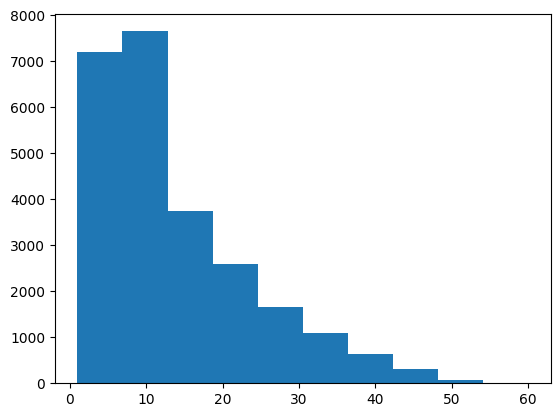

In [72]:
plt.hist([len(i) for i in X_test])

In [73]:
sum([len(i) for i in X_test])/len(X_test)

13.64784

In [74]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [75]:
below_threshold_len(30,X_train)

전체 샘플 중 길이가 30 이하인 샘플의 비율: 93.78593995045117


In [76]:
below_threshold_len(30,X_test)

전체 샘플 중 길이가 30 이하인 샘플의 비율: 91.47999999999999


In [77]:
below_threshold_len(40,X_test), below_threshold_len(40,X_train)

전체 샘플 중 길이가 40 이하인 샘플의 비율: 97.78
전체 샘플 중 길이가 40 이하인 샘플의 비율: 99.03857081164625


(None, None)

In [78]:
X_test

array([list(['채소', '약간', '시들어', '있어요']),
       list(['발톱', '두껍고', '단단한', '분들', '써도', '소용없어요', '테이프', '물렁거리', '힘', '없어서', '들어', '올리지를', '못', '함', '딱딱한', '테이프', '찾고있는데', '또', '돈', '날렸어요', '..']),
       list(['부들부들', '좋네요', '입어보고', '시원하면', '또', '살게요']), ...,
       list(['세트', '상품', '이라고', '써있어서', '그런줄', '알', '구매', '했더니', '단', '품', '이었네요', '낚', '느낌', '들고', '그러네요', '딘품', '이란', '표시', '안', '해놓으시고', '이런', '식', '으로', '판매', '하시는', '건', '아닌듯', '싶어요', '물건', '가격', '대비', '별', '루', '요']),
       list(['역시', '로', '펠트', '!!', '좋아요', '.']),
       list(['데싱', '디바', '써', '보고', '갠', '찮아서', '비슷', '줄', '알앗더니', '완전', '별로', '예요', 'ㅡㅡ', '3000', '언', '더주고', '디바', '낫네요'])],
      dtype=object)

In [79]:
X_train = pad_sequences(X_train, maxlen=40)
X_test = pad_sequences(dummy, maxlen=40)

In [80]:
X_train

array([[    0,     0,     0, ..., 14338,   654,  8716],
       [    0,     0,     0, ...,    10,   109, 16972],
       [    0,     0,     0, ...,    10,   109, 16972],
       ...,
       [    0,     0,     0, ...,     7,    76,  2165],
       [    0,     0,     0, ...,   233,    85,  6247],
       [    0,     0,     0, ...,   260,    83,   396]])

In [81]:
X_test

array([[    0,     0,     0, ...,   236, 21550,    96],
       [    0,     0,     0, ...,   119,  5949,    26],
       [    0,     0,     0, ...,     1,    76,  4268],
       ...,
       [    0,     0,     0, ...,   222,   688,     6],
       [    0,     0,     0, ...,   292,     7,     3],
       [    0,     0,     0, ...,  1483,  7888,  2611]])

# LSTM 사용

In [82]:
from tensorflow.keras.layers import Embedding, Dense, LSTM,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [83]:
embedding_dim = 100
hidden_units = 256

model = Sequential()
model.add(Embedding(vocab_size, 40))
model.add(LSTM(hidden_units,return_sequences=True,activation='tanh'))
model.add(LSTM(hidden_units,activation='tanh'))
model.add(Dense(hidden_units*2,activation='relu'))
model.add(Dense(4,activation='softmax'))


In [84]:

es = EarlyStopping(monitor='acc', patience=3)
mc = ModelCheckpoint('best_model.h5', monitor='acc', save_best_only=True)

In [85]:
Y_train

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       ...,
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1]], dtype=uint8)

In [86]:

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'],)
history = model.fit(X_train, Y_train, epochs=30, callbacks=[es, mc], batch_size=16,validation_split=0.2)

Epoch 1/30
2200/2200 [==============================] - 51s 20ms/step - loss: 0.6479 - acc: 0.7505 - val_loss: 2.5029 - val_acc: 0.0418
Epoch 2/30
2200/2200 [==============================] - 43s 20ms/step - loss: 0.3812 - acc: 0.8541 - val_loss: 2.0233 - val_acc: 0.0959
Epoch 3/30
2200/2200 [==============================] - 43s 19ms/step - loss: 0.2435 - acc: 0.9111 - val_loss: 2.4923 - val_acc: 0.2570
Epoch 4/30
2200/2200 [==============================] - 43s 19ms/step - loss: 0.1523 - acc: 0.9451 - val_loss: 2.7618 - val_acc: 0.3148
Epoch 5/30
2200/2200 [==============================] - 43s 19ms/step - loss: 0.1063 - acc: 0.9620 - val_loss: 3.4307 - val_acc: 0.2819
Epoch 6/30
2200/2200 [==============================] - 42s 19ms/step - loss: 0.0802 - acc: 0.9721 - val_loss: 3.8913 - val_acc: 0.3615
Epoch 7/30
2200/2200 [==============================] - 42s 19ms/step - loss: 0.0623 - acc: 0.9783 - val_loss: 3.7080 - val_acc: 0.3903
Epoch 8/30
2200/2200 [==========================

In [87]:
result = pd.DataFrame(model.predict(X_test))

result.to_csv('result.csv')



782/782 [==============================] - 7s 8ms/step


In [88]:
result = result.to_numpy()

In [89]:
종류 =  [1,2,4,5]

In [90]:
testPred = []

for i in result:
    testPred.append(종류[np.argmax(i)])

In [91]:
testPred = pd.DataFrame(testPred)

In [92]:
testPred.to_csv('result.csv')

In [93]:
testPred

,0
0,2
1,2
2,5
3,2
4,2
...,...
24995,5
24996,2
24997,2
24998,1
